### Interpretability Cases:

The question relates to cool data set of 2000 women's pregnancies with bio and demo data about the patients.   
Target is whether the woman had a term or pre-term birth.  
The AUC was .83 on training, but much lower on production.  
So we are hoping you can provide a perspective on why and if we can do anything in the future to improve it. 

<img src="image/structure_2.PNG">

### Preq

In [61]:
# imports
import h2o 
import numpy as np
import pandas as pd
from collections import Counter 
import seaborn as sns
from heapq import nlargest 

# display matplotlib graphics in notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
# start h2o
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,40 mins 43 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,4 months and 26 days !!!
H2O cluster name:,H2O_from_python_Zi_Wei_Fan_836jss
H2O cluster total nodes:,1
H2O cluster free memory:,1.576 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


### Read the Training & Production data.

In [63]:
path_training = 'data/Compiled_list_for_AI_training.csv'
frame_training = h2o.import_file(path=path_training)

path_production = 'data/nir_validation.csv'
frame_production = h2o.import_file(path=path_production)

pd.options.display.max_columns = None

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [64]:
training_seq_no = frame_training['Seq no']
production_seq_no = frame_production['Seq no']

- Drop 'Seq No.', 'Training =1, Validation = 2' and for binary classification, lables should be a factor.

In [65]:
target='Gestational Category at Delivery'
#y = target.replace(' ', '_')

In [66]:
frame_training = frame_training.drop('Training =1, Validation = 2').drop('Seq no')
frame_production = frame_production.drop('Training =1, Validation = 2').drop('Seq no')

frame_training[target] = frame_training[target].asfactor()
frame_training.head(3)

Gestational Category at Delivery,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
Term,20.86,36.66,3,1,29.6,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No Cervical change (Long and Closed),,,,,Not done,,,,,,,No,No,No,No,No,No,106.457,299.31,1.05487,3.62024,50.9865,12.1944,58.5296,31863.6,112.299,385.4,5427.87,1298.18,6230.89,315.733,1083.57,15260.8,3649.9,17518.5,3.81889,53.7842,12.8635,61.7412,184.583,44.1466,211.891,621.749,2984.22,713.732,21.0658,28.8227,0.0407417,11.5601,0.526458,0.397284,0.659151,0.781434,0.71527,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.08519,1.01903,1.01138,1.14131,1.13366,1.0675,0.746046,1.00791,1.1302,1.06403,1.05638,0.87874,1.00102,0.934858,0.927207,1.26289,1.19673,1.18907,1.31901,1.31136,1.24519,1.04981,1.17209,1.10593,1.09827,1.43396,1.36779,1.36014,1.49008,1.48242,1.41626,1.30478,1.23862,1.23097,1.3609,1.35325,1.28709,1.62277,1.61512,1.54895,1.67124,0.0619736,0.0390199,0.0855525,0.107282,0.0955245,0.0941649,0.0765842,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
Term,23.57,26.26,3,2,31,Yes,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No Cervical change (Long and Closed),No,No,No,No,Done,Yes,No,No,No,No,GBS not reported,No,No,No,No,No,No,1322.59,2453.53,120.71,1.39547,1778.65,69.1083,74.4008,3.245e+06,159650,1845.62,2.35242e+06,91401.7,98401.5,296166,3423.81,4.36397e+06,169559,182544,168.447,214701,8342.07,8980.93,2482.05,96.4383,103.824,122920,132333,5141.71,179.324,205.415,0.0281669,0.572515,5.06654,27.3354,2.39321,23.2689,5.25418,2.88125,27.9866,3.04449,23.9202,5.90546,3.53252,25.3133,46.189,28.1743,25.8014,21.2469,3.23214,0.859202,24.1078,21.7349,3.72017,30.1943,5.25212,26.1278,8.11309,5.74015,27.5209,48.3966,30.3819,28.009,23.4545,5.43977,3.06683,26.3155,23.9425,5.9278,28.1722,49.0479,31.0332,28.6603,24.1058,6.09104,3.71811,26.9667,24.5938,6.57908,46.3746,28.3599,25.9869,49.2356,46.8626,28.8479,24.2934,21.9205,3.90576,24.7814,6.3114,55.4727,0.409699,46.4955,6.72566,1.4871,71.8378,0.530564,60.2122,8.70981,1.92581,4.66328,529.222,76.553,16.9265,3.90861,0.565388,0.125012,64.1643,14.1873,2.05222
Term,20.29,38.99,2,0,24.6,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No Cervical change (Long and Closed),,,,,Not done,,,,,,,No,Yes,No,Yes,No,No,145.187,100.242,0.03125,1.64485,21.5582,0.15625,74.4387,14553.9,4.53709,238.811,3129.96,22.6855,10807.5,3.13257,164.883,2161.04,15.6629,7461.91,0.0514015,0.673692,0.00488281,2.32621,35.4599,0.257008,122.44,3.36846,1604.76,11.6311,12.2552,5.72527,0.00155872,5,0.359147,0.248848,0.461091,0.497616,0.249231,0.916306,0.12331,0.335553,0.372078,0.123693,0.790768,0.225253,0.261779,0.0133933,0.680468,0.474022,0.225636,0.8927

### <font color='red'>Session 1: Comparison training & production. </font>

#### 1.0: convert to pd frame for temp testing.

In [67]:
pd_frame_training = frame_training.as_data_frame()
pd_frame_production = frame_production.as_data_frame()

In [68]:
pd_frame_training.head(3)

,Gestational Category at Delivery,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
0,Term,20.86,36.66,3,1,29.6,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No Cervical change (Long and Closed),NaN,NaN,NaN,NaN,Not done,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,106.457,299.309745,1.054872,3.620242,50.986506,12.194384,58.529598,3.186362e+04,112.298508,385.400067,5.427870e+03,1298.177537,6230.885414,315.733469,1083.573610,1.526076e+04,3649.897965,17518.479050,3.818892,53.784238,12.863514,61.741234,184.583473,44.146617,211.891289,621.749033,2984.219700,713.732393,21.065801,28.822703,0.040742,11.560060,0.526458,0.397284,0.659151,0.781434,0.715270,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.085195,1.019030,1.011378,1.141313,1.133662,1.067497,0.746046,1.007914,1.130197,1.064032,1.056381,0.878740,1.001023,0.934858,0.927207,1.262890,1.196725,1.189074,1.319009,1.311357,1.245192,1.049806,1.172090,1.105925,1.098274,1.433957,1.367792,1.360141,1.490076,1.482424,1.416259,1.304783,1.238618,1.230967,1.360901,1.353250,1.287085,1.622769,1.615117,1.548952,1.671236,0.061974,0.039020,0.085553,0.107282,0.095525,0.094165,0.076584,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
1,Term,23.57,26.26,3,2,31.0,Yes,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No Cervical change (Long and Closed),No,No,No,No,Done,Yes,No,No,No,No,GBS not reported,No,No,No,No,No,No,1322.586,2453.526700,120.710130,1.395467,1778.650800,69.108300,74.400800,3.245000e+06,159649.528000,1845.624677,2.352419e+06,91401.670060,98401.456470,296165.526900,3423.814726,4.363967e+06,169559.059200,182544.349300,168.446963,214701.169300,8342.071877,8980.930240,2482.047904,96.438329,103.823836,122919.533100,132333.042400,5141.712807,179.323800,205.415339,0.028167,0.572515,5.066535,27.335364,2.393213,23.268903,5.254183,2.881249,27.986639,3.044488,23.920178,5.905458,3.532525,25.313317,46.189008,28.174287,25.801354,21.246856,3.232136,0.859202,24.107826,21.734893,3.720172,30.194269,5.252118,26.127808,8.113088,5.740154,27.520947,48.396638,30.381917,28.008984,23.454486,5.439766,3.066832,26.315456,23.942523,5.927802,28.172222,49.047913,31.033192,28.660259,24.105761,6.091041,3.718108,26.966731,24.593798,6.579077,46.374591,28.359870,25.986937,49.235561,46.862627,28.847907,24.293409,21.920476,3.905755,24.781446,6.311404,55.472738,0.409699,46.495498,6.725661,1.487102,71.837807,0.530564,60.212182,8.709806,1.925814,4.663280,529.222079,76.552972,16.926530,3.908614,0.565388,0.125012,64.164284,14.187283,2.052217
2,Term,20.29,38.99,2,0,24.6,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No Cervical change (Long and Closed),NaN,NaN,NaN,NaN,Not done,NaN,NaN,NaN,NaN,NaN,NaN,

In [69]:
pd_frame_training['Gestational Category at Delivery'].unique()

array(['Term', 'Preterm (?20 weeks < 37 weeks)'], dtype=object)

#### 1.1: Compare columns numbers of T & P data:  
- <font color='red'>1 column difference</font> between Training & production.
- <font color='red'>Gestational Category at Delivery</font> is missed in production.

In [70]:
print('Training column number: ', len(pd_frame_training.columns))
print('Production column number: ',len(pd_frame_production.columns))
print('Column difference: ', set(pd_frame_training.columns)-set(pd_frame_production.columns))

Training column number:  149
Production column number:  148
Column difference:  {'Gestational Category at Delivery', 'Have any previous pregnancies had an antepartum haemorrhage?(?50ml)'}


#### 1.2: Exploration based on raw data:

- __Training:__  Without pre-processing the data: null data, encoder etc.

In [71]:
desc_training=pd_frame_training.describe()
desc_training

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,136.000000,136.000000,136.000000,136.000000,135.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,19.646912,33.465147,2.360294,0.698529,25.024222,554.494669,979.075364,5.214945,5.901148,97.346723,25.940555,93.895057,7.236559e+05,4609.891160,3830.542488,6.947935e+04,18586.897351,72609.782904,9530.978112,11673.388449,1.386575e+05,41532.986099,118785.686501,54.568113,2041.957433,240.561174,613.507263,528.762419,232.630565,675.519146,3838.465461,9114.123872,2953.319360,72.148444,80.333631,0.032945,40.119651,2.066391,2.011123,1.710343,2.078247,2.069107,1.775669,2.226415,1.925634,2.293538,2.284398,1.990960,1.870367,2.238271,2.229131,1.935693,1.937490,1.928350,1.634912,2.296254,2.002816,1.993676,3.151964,2.851184,3.219088,3.209947,2.916510,2.795917,3.163821,3.154680,2.861242,2.863040,2.853900,2.560462,3.221804,2.928366,2.919226,3.011208,3.379112,3.369972,3.076534,3.078331,3.069191,2.775753,3.437095,3.143657,3.134517,3.023064,3.013924,2.720486,3.381828,3.088390,3.079250,3.081047,2.787609,2.778469,3.146373,1.407484,1.601779,0.850318,1.373258,1.367690,1.097323,2.311831,1.808942,1.913138,2.133441,1.253170,1.510662,5.033270,2.207566,1.156289,0.832671,1.363842,0.813380,2.003688,0.977115,1.178762
std,2.198234,4.074251,1.359045,0.743564,6.415595,518.024662,931.568661,10.794359,23.975894,153.863305,22.949406,62.788515,1.165532e+06,14269.084400,15859.129459,2.098357e+05,27597.303876,96951.103234,26967.146120,73338.854767,3.911068e+05,58948.563430,159041.084509,351.104849,18379.487244,740.785080,1026.129651,2183.857122,1376.237577,3179.685802,10890.861390,13341.161537,3534.966560,55.640833,70.789940,0.034559,135.958560,1.623055,2.645685,3.341297,2.164335,1.547358,1.302469,2.896549,3.631241,2.388036,1.967672,1.439544,4.067325,3.998546,2.831825,2.417139,3.652570,3.482825,3.283995,2.392509,1.907063,1.327767,3.323992,3.858974,2.788555,2.439444,2.038114,4.329369,4.307694,3.254676,2.901502,3.867295,3.708180,3.522445,2.777082,2.372223,1.938903,4.660988,4.531481,3.609718,3.123188,4.191105,4.101103,3.791373,3.126876,2.567304,2.276402,5.228521,4.522494,4.198952,4.509955,4.095873,3.037922,4.084808,3.735420,3.628237,2.541233,2.266917,4.958018,3.520468,4.147397,2.030708,1.465184,6.541142,11.364798,5.396326,3.028034,1.677858,9.719974,45.304040,6.797987,1.933966,3.439037,8.068459,3.828599,5.685

 - __Production:__ Without pre-processing the data: null data, encoder etc.

In [72]:
desc_production=pd_frame_production.describe()
desc_production

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,150.000000,150.000000,150.000000,150.000000,148.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,19.310467,33.113733,2.473333,0.793333,25.015878,639.537762,748.615912,4.431144,8.986554,72.759349,19.731574,125.458490,5.904949e+05,3932.318802,5895.273993,52234.270998,16801.137493,132512.113804,5596.069279,17094.748010,7.645985e+04,26155.672830,1.240323e+05,84.211212,410.819898,148.123518,796.675203,958.505381,385.135907,1468.378228,2076.409953,10004.864693,3368.514862,73.026387,61.321347,0.029579,11.643876,1.939806,1.989915,2.262623,1.929056,1.937343,2.203394,1.794717,2.067425,1.733859,1.742146,2.008196,2.117534,1.783968,1.792255,2.058305,2.056675,2.064963,2.331013,1.731396,1.997447,2.005734,2.862219,3.134927,2.801360,2.809648,3.075698,3.185036,2.851469,2.859756,3.125807,3.124177,3.132464,3.398515,2.798898,3.064948,3.073235,2.989838,2.656272,2.664559,2.930609,2.928980,2.937267,3.203317,2.603700,2.869751,2.878038,2.979089,2.987376,3.253426,2.653809,2.919860,2.928147,2.926517,3.192567,3.200855,2.867288,1.148491,1.366346,1.308655,1.032409,1.236288,2.002603,1.357381,2.649051,1.054961,1.343549,1.308522,2.331300,1.012640,1.359290,1.501509,1.509410,2.257934,1.768046,1.083891,1.072611,1.344479
std,1.688122,4.265422,1.629002,1.076264,5.389998,632.012514,770.417854,4.071459,27.958160,47.311200,19.198739,106.243988,1.000191e+06,5990.478843,14840.451771,74516.155686,27919.809857,202432.568972,8618.912169,69011.803322,1.228820e+05,41433.271715,2.269844e+05,312.231888,529.612466,202.591701,1165.975761,3595.085053,1519.330648,5227.538906,2809.012892,14607.673580,5385.326478,62.001336,58.940041,0.031540,42.678288,1.535026,1.612353,3.873464,1.285945,1.564865,1.904961,1.623925,4.226723,1.315540,1.643048,1.539741,4.125202,1.212829,1.598744,1.599127,3.886443,4.122386,3.946708,1.305219,1.195141,1.535989,2.226212,4.413817,1.872960,2.206722,2.347745,4.354861,1.891884,2.248763,2.455452,4.063301,4.335057,4.283252,1.913896,2.087786,2.383785,4.708582,2.000171,2.377437,2.261778,4.444760,4.712961,4.500740,2.073116,1.866757,2.232079,4.328494,4.616063,4.436521,1.995509,1.870577,2.261088,4.352848,4.128620,4.411752,1.880363,1.945334,2.081486,3.294338,1.472810,2.054439,3.059284,2.090600,10.694266,1.695474,2.128319,2.394650,8.643816,1.305455,1.859130,2.197537,5.661373,8.907370,6.294380,1.466311,1.

- Filter and get the variables of T & P with difference rate >0.3:

In [73]:
diff_rate = abs(desc_training-desc_production)/abs(desc_production)
#difference_locations = np.where(diff_rate>0.3)
ne_stacked = (diff_rate>0).stack()
changed = ne_stacked[ne_stacked]
changed.index.names = ['id', 'col']

In [74]:
diff_rate

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,0.093333,0.093333,0.093333,0.093333,0.087838,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333
mean,0.017423,0.010612,0.045703,0.119501,0.000334,0.132976,0.307847,0.176885,0.343336,0.337927,0.314672,0.251585,0.225508,0.172309,0.350235,0.330149,0.106288,0.452052,0.703156,0.317136,0.813468,0.587915,0.042301,0.352009,3.970444,0.624058,0.229915,0.448347,0.395978,0.539956,0.848607,0.089031,0.123258,0.012022,0.310043,0.113806,2.445558,0.065256,0.010658,0.244088,0.077339,0.068012,0.194121,0.240538,0.068583,0.322794,0.311255,0.008583,0.116724,0.254659,0.243758,0.059570,0.057950,0.066157,0.298626,0.326244,0.002688,0.006012,0.101231,0.090510,0.149116,0.142473,0.051757,0.122171,0.109541,0.103129,0.084639,0.083586,0.088928,0.246594,0.151097,0.044563,0.050113,0.007147,0.272126,0.264739,0.049793,0.050991,0.044914,0.133475,0.320081,0.095446,0.089116,0.014761,0.008887,0.163809,0.274330,0.057719,0.051604,0.052803,0.126844,0.131960,0.097334,0.225508,0.172309,0.350235,0.330149,0.106288,0.452052,0.703156,0.317136,0.813468,0.587915,0.042301,0.352009,3.970444,0.624058,0.229915,0.448347,0.395978,0.539956,0.848607,0.089031,0.123258
std,0.302178,0.044819,0.165719,0.309125,0.190278,0.180357,0.209173,1.651226,0.142437,2.252154,0.195360,0.409016,0.165310,1.381961,0.068642,1.815976,0.011551,0.521070,2.128834,0.062700,2.182784,0.422735,0.299330,0.124500,33.703653,2.656542,0.119939,0.392544,0.094182,0.391743,2.877113,0.086702,0.343593,0.102587,0.201050,0.095731,2.185661,0.057347,0.640884,0.137388,0.683070,0.011188,0.316275,0.783671,0.140885,0.815252,0.197575,0.065074,0.014030,2.296875,0.771280,0.511537,0.060177,0.155143,0.167915,0.833032,0.595680,0.135562,0.493116,0.125706,0.488849,0.105461,0.131884,0.005854,1.276934,0.447318,0.181657,0.048238,0.144606,0.177624,0.451010,0.136238,0.186628,0.010108,1.265547,0.518323,0.380855,0.057068,0.129825,0.157611,0.508298,0.375275,0.019857,0.207931,0.020270,0.053549,1.260053,1.189631,0.343566,0.061578,0.095238,0.177597,0.351459,0.165310,1.381961,0.068642,1.815976,0.011551,0.521070,2.128834,0.062700,2.182784,0.422735,0.299330,0.124500,33.703653,2.656542,0.119939,0.392544,0.094182,0.391743,2.877113,0.086702,0.343593
min,0.000000,0.075750,0.000000,NaN,0.012346,0.758650,0.791367,0.788375,3.758746,0.200993,0.000000,6.575758,0.398837,0.885472,0.315857,0.736273,0.606665,0.311850,0.693813,4.313906,1.560059,1.203508,2.191914,0.343918,0.525444,0.769088,0.709226,7.904096,7.738909,4.358142,1.631662,12.365850,3.551269,0.052881,0.799734,0.560187,6.132341,0.127029,0.713192,0.399143,0.179356,0.791897,0.

#### The following features are quite different between training and production datasets. 
- The difference rate is '0.3' to filter the variables name in prod and training data.
e.g.:  
<font color='red'>'Gestational Age at Collection' in Std</font>  
<font color='red'>'Parity ' in std, mean, etc</font>
<font color='red'> as below: </font>

In [75]:
for col in diff_rate.columns:
    ind = diff_rate[diff_rate[col]>0.3].index.values
    print(col,':', ind)

Gestational Age at Collection : ['std']
Maternal Age at Recruitment / 1st Sample : []
Gravidity : []
Parity : ['std' 'max']
Maternal BMI : []
B1 : ['min']
B2 : ['mean' 'min' '50%' '75%']
B3 : ['std' 'min' '25%' 'max']
B4 : ['mean' 'min' '25%' '50%']
B5 : ['mean' 'std' 'max']
B6 : ['mean' '25%' '50%']
B7 : ['std' 'min' 'max']
P1 : ['min']
P2 : ['std' 'min' '25%' 'max']
P3 : ['mean' 'min' '50%' 'max']
P4 : ['mean' 'std' 'min' 'max']
P5 : ['min' '25%' '50%' '75%']
P6 : ['mean' 'std' 'min' '75%' 'max']
P7 : ['mean' 'std' 'min' '25%' '50%' '75%' 'max']
P8 : ['mean' 'min' '25%' '50%' '75%' 'max']
P9 : ['mean' 'std' 'min' '25%' '50%' '75%' 'max']
P10 : ['mean' 'std' 'min' '25%' '50%' '75%']
P11 : ['min' 'max']
P12 : ['mean' 'min' '25%' '50%' '75%' 'max']
P13 : ['mean' 'std' 'min' '25%' '75%' 'max']
P14 : ['mean' 'std' 'min' '25%' 'max']
P15 : ['min' '25%' 'max']
P16 : ['mean' 'std' 'min' '25%' '50%' '75%']
P17 : ['mean' 'min' '25%' '50%' '75%']
P18 : ['mean' 'std' 'min' '25%' '50%' 'max']
P19

#### 1.3: Check The top columns with the higher % of null values:  

- __Training__: the top 3 variables with most null values:

In [76]:
dict_pd_frame_training_null_nums = dict(pd_frame_training.isnull().sum())
Top3_null_values = Counter(dict_pd_frame_training_null_nums).most_common(3)
Top3_null_values

[('Microbiology Notes', 79),
 ('Cervical Sludge', 74),
 ('Cervical Funnelling', 74)]

,Total,Percent
Microbiology Notes,79,0.580882
Cervical Blackline Appearance,74,0.544118
Cervical Beaking,74,0.544118
Cervical Funnelling,74,0.544118
Cervical Sludge,74,0.544118


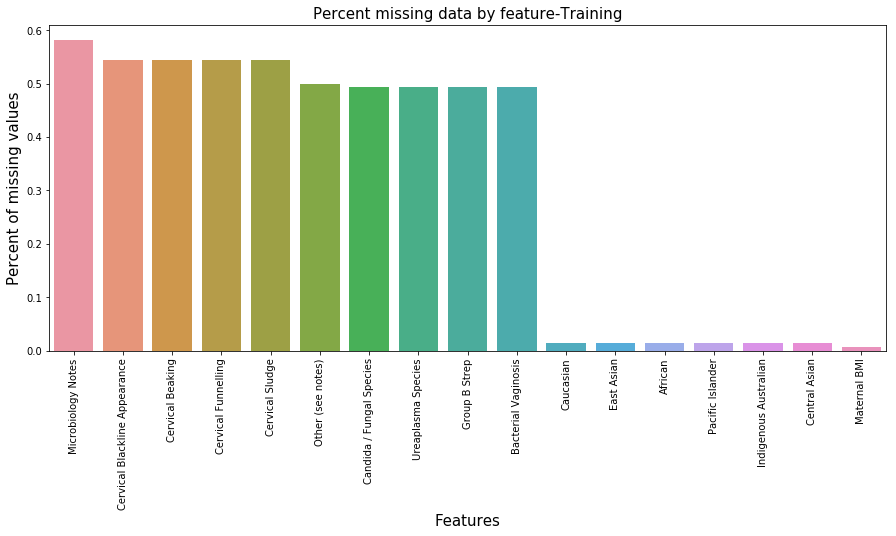

In [77]:
total_null_training = pd_frame_training.isnull().sum().sort_values(ascending=False)
percent_null_training = (pd_frame_training.isnull().sum()/pd_frame_training.isnull().count()).sort_values(ascending=False)
missing_data_training = pd.concat([total_null_training[0:17], percent_null_training[0:17]], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_training.index, y=missing_data_training['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature-Training', fontsize=15)
missing_data_training.head()

- __Production__: the top 3 variables with most null values:

,Total,Percent
Cervical Sludge,109,0.726667
Cervical Blackline Appearance,109,0.726667
Cervical Beaking,109,0.726667
Cervical Funnelling,109,0.726667
Microbiology Notes,73,0.486667


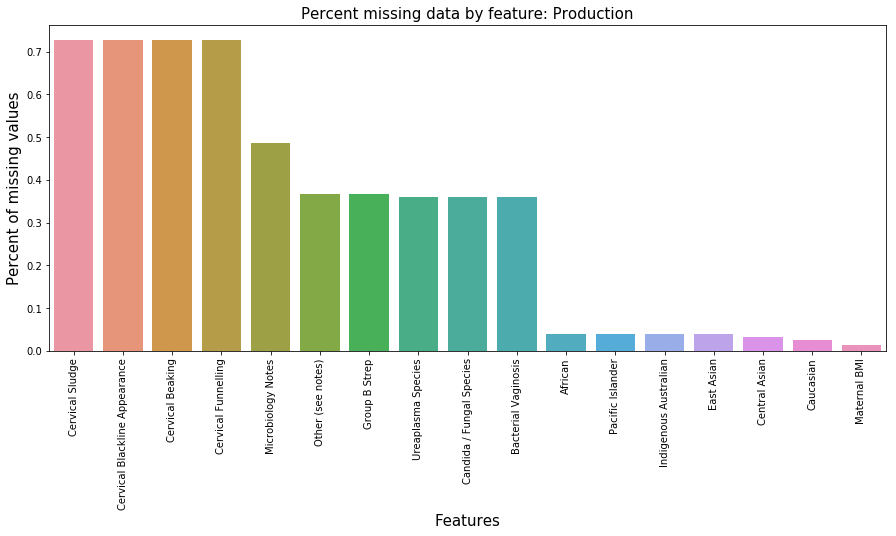

In [78]:
total_null_prod = pd_frame_production.isnull().sum().sort_values(ascending=False)
percent_null_prod = (pd_frame_production.isnull().sum()/pd_frame_production.isnull().count()).sort_values(ascending=False)
missing_data_prod = pd.concat([total_null_prod[0:17], percent_null_prod[0:17]], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_prod.index, y=missing_data_prod['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature: Production', fontsize=15)
missing_data_prod.head()

#### Note:
- the top 17 features with highest & missing data.

--------------------------------------------
### <font color='red'>Session 1: Exploration Conclusion: </font>
- __Different columns in T & P:__   
  <font color='red'> Gestational Category at Delivery</font> is missed in production.__  
  
- __Difference top variables with null values in T & P:__  
    - Training top 2 features: <font color='red'>'Microbiology Notes', 'Cervical Sludge', 'Cervical Funnelling'</font>;  
    - Production top 2 features: <font color='red'>'Cervical Sludge', 'Cervical Blackline Appearance', 'Cervical Beaking'</font>.  
- __Lots of features have great difference in description information between T & P (>30% difference):__  
    __e.g.:__  
     'Gestational Age at Collection' difference in 'std' between T & P is <font color='red'>0.302178</font>.  
     'B1' difference in 'min' between T & P is <font color='red'>0.758650</font>.  
     'B2' difference in '50%' between T & P is <font color='red'>0.540345</font>.
-----------------------------------------------

### <font color='red'>2: Data Pre-process:</font>

#### 2.0: Replace space in column names with underscore. (deprecated)

In [79]:
# Set new target with underscore:
#y = 'Gestational_Category_at_Delivery'

In [80]:
'''
def fill_space_col(df):
    for col in df.columns:
        if ' ' in col:
            print(col)
            df.columns = df.columns.str.replace(' ', '_')
    return df.columns
'''

In [81]:
#fill_space_col(pd_frame_training)

In [82]:
#fill_space_col(pd_frame_production)

#### 2.1: Fill the null values in T & P data:

In [83]:
list_top_null = list(missing_data_training.index)

for item in list_top_null:
    pd_frame_training[item].fillna(pd_frame_training[item].mode()[0], inplace=True)

####  No null in training data after fill in the missing values with the most common value :

In [84]:
total_null_training = pd_frame_training.isnull().sum().sort_values(ascending=False)
percent_null_training = (pd_frame_training.isnull().sum()/pd_frame_training.isnull().count()).sort_values(ascending=False)
missing_data_training = pd.concat([total_null_training[0:17], percent_null_training[0:17]], axis=1, keys=['Total', 'Percent'])

missing_data_training.head()

,Total,Percent
P102,0,0.0
P8,0,0.0
P6,0,0.0
P5,0,0.0
P4,0,0.0


#### Fill the na in prod:

In [85]:
list_top_null = list(missing_data_prod.index)

for item in list_top_null:
    pd_frame_production[item].fillna(pd_frame_production[item].mode()[0], inplace=True)

#### No null in production data with >60% missing percent, after fill in the missing values with the most common value.

In [86]:
total_null_prod= pd_frame_production.isnull().sum().sort_values(ascending=False)
percent_null_prod = (pd_frame_production.isnull().sum()/pd_frame_production.isnull().count()).sort_values(ascending=False)
missing_data_prod = pd.concat([total_null_prod[0:17], percent_null_prod[0:17]], axis=1, keys=['Total', 'Percent'])

missing_data_prod.head()

,Total,Percent
Polyhydramnios,1,0.006667
Uterine Malformation,1,0.006667
History of cervical surgery,1,0.006667
P9,0,0.000000
P8,0,0.000000


#### 2.2: Encoder: convert string/object type to int.

#### Training data conversion:

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
le = LabelEncoder()

- Copy the original data for encoder processing:

In [89]:
pd_frame_training_cp = pd_frame_training.copy()

- Convert to codes:

In [90]:
for col in pd_frame_training_cp:
    if pd_frame_training_cp[col].dtype == 'object':
        pd_frame_training_cp[col] = pd_frame_training_cp[col].astype("category").cat.codes
        #print(col, pd_frame_training_cp[col].dtype)

In [91]:
pd_frame_training_cp.head(3)

,Gestational Category at Delivery,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
0,1,20.86,36.66,3,1,29.6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,106.457,299.309745,1.054872,3.620242,50.986506,12.194384,58.529598,3.186362e+04,112.298508,385.400067,5.427870e+03,1298.177537,6230.885414,315.733469,1083.573610,1.526076e+04,3649.897965,17518.479050,3.818892,53.784238,12.863514,61.741234,184.583473,44.146617,211.891289,621.749033,2984.219700,713.732393,21.065801,28.822703,0.040742,11.560060,0.526458,0.397284,0.659151,0.781434,0.715270,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.085195,1.019030,1.011378,1.141313,1.133662,1.067497,0.746046,1.007914,1.130197,1.064032,1.056381,0.878740,1.001023,0.934858,0.927207,1.262890,1.196725,1.189074,1.319009,1.311357,1.245192,1.049806,1.172090,1.105925,1.098274,1.433957,1.367792,1.360141,1.490076,1.482424,1.416259,1.304783,1.238618,1.230967,1.360901,1.353250,1.287085,1.622769,1.615117,1.548952,1.671236,0.061974,0.039020,0.085553,0.107282,0.095525,0.094165,0.076584,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
1,1,23.57,26.26,3,2,31.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1322.586,2453.526700,120.710130,1.395467,1778.650800,69.108300,74.400800,3.245000e+06,159649.528000,1845.624677,2.352419e+06,91401.670060,98401.456470,296165.526900,3423.814726,4.363967e+06,169559.059200,182544.349300,168.446963,214701.169300,8342.071877,8980.930240,2482.047904,96.438329,103.823836,122919.533100,132333.042400,5141.712807,179.323800,205.415339,0.028167,0.572515,5.066535,27.335364,2.393213,23.268903,5.254183,2.881249,27.986639,3.044488,23.920178,5.905458,3.532525,25.313317,46.189008,28.174287,25.801354,21.246856,3.232136,0.859202,24.107826,21.734893,3.720172,30.194269,5.252118,26.127808,8.113088,5.740154,27.520947,48.396638,30.381917,28.008984,23.454486,5.439766,3.066832,26.315456,23.942523,5.927802,28.172222,49.047913,31.033192,28.660259,24.105761,6.091041,3.718108,26.966731,24.593798,6.579077,46.374591,28.359870,25.986937,49.235561,46.862627,28.847907,24.293409,21.920476,3.905755,24.781446,6.311404,55.472738,0.409699,46.495498,6.725661,1.487102,71.837807,0.530564,60.212182,8.709806,1.925814,4.663280,529.222079,76.552972,16.926530,3.908614,0.565388,0.125012,64.164284,14.187283,2.052217
2,1,20.29,38.99,2,0,24.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,145.187,100.242344,0.031250,1.644848,21.558151,0.156250,74.438743,1.455389e+04,4.537094,238.810617,3.129963e+03,22.685469,10807.537780,3.132573,164.883468,2.161040e+03,15.662866,7461.914083,0.051402,0.673692,0.004883,2.326211,35.459892,0.257008,122.4

#### Production data conversion:

In [92]:
pd_frame_prod_cp = pd_frame_production.copy()

In [93]:
for col in pd_frame_prod_cp:
    if pd_frame_prod_cp[col].dtype == 'object':
        pd_frame_prod_cp[col] = pd_frame_prod_cp[col].astype("category").cat.codes
        #print(col, pd_frame_training_cp[col].dtype)

In [94]:
pd_frame_prod_cp.head(3)

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage? (? 50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
0,19.71,40.19,6,1,19.5,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,298.190,261.746526,0.450185,2.320416,47.754155,5.051621,146.812500,78050.19659,134.240665,691.924847,14239.81148,1506.342866,43778.01938,117.834360,607.360827,12499.48417,1322.244247,38427.661850,1.044616,21.498204,2.274164,66.092785,110.809505,11.721862,340.666074,241.235892,7010.906881,741.641108,29.900788,19.593095,0.019300,11.221211,0.802725,0.591445,0.806324,1.063196,0.720426,1.826962,0.398706,0.613585,0.870457,0.527687,1.634223,0.402305,0.659177,0.316408,1.422943,0.874056,0.531286,1.637822,0.788159,1.894694,1.551924,0.896438,1.111317,1.368189,1.025419,2.131955,0.900037,1.156909,0.814139,1.920675,1.371788,1.029018,2.135553,1.285890,2.392426,2.049656,0.707298,0.964170,0.621401,1.727936,1.179049,0.836279,1.942815,1.093152,2.199687,1.856917,0.967769,0.624999,1.731535,0.881872,1.988407,1.645637,1.096750,2.203286,1.860516,2.117388,0.151805,0.046644,0.153596,0.281450,0.110842,0.661600,0.028582,0.094118,0.172463,0.067920,0.405406,0.028919,0.052991,0.020869,0.124566,0.174498,0.068722,0.410190,0.125926,0.751632,0.296012
1,18.71,21.55,2,0,25.9,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,400.607,136.302270,0.157675,0.219610,57.439429,8.165659,28.218750,54603.64348,63.165709,87.977303,23010.63733,3271.220155,11304.62878,21.491460,29.933342,7829.12456,1112.997858,3846.279682,0.034627,9.056762,1.287520,4.449391,12.614273,1.793260,6.197120,469.030790,1620.868887,230.424690,41.549576,15.738007,0.059908,51.787912,0.827506,0.701506,0.697890,1.348833,1.028657,0.924174,0.191645,0.188028,0.838971,0.518795,0.414313,0.062028,0.712972,0.392795,0.288313,0.709355,0.389179,0.284696,1.040122,0.935639,0.615463,0.860329,0.856712,1.507655,1.187479,1.082997,0.730712,1.381655,1.061479,0.956997,1.378039,1.057863,0.953380,1.708806,1.604323,1.284147,0.220851,0.871794,0.551618,0.447136,0.868177,0.548001,0.443519,1.198944,1.094462,0.774286,0.742177,0.422001,0.317519,1.072944,0.968462,0.648286,1.069328,0.964845,0.644669,1.295612,0.106202,0.021948,0.019530,0.454805,0.240708,0.170842,0.005213,0.004639,0.108023,0.057172,0.040578,0.000959,0.022324,0.011815,0.008386,0.019864,0.010513,0.007462,0.244835,0.173772,0.091970
2,17.71,31.74,2,0,22.3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,1,0,0,372.616,897.390914,6.279067,1.659810,102.229526,38.117901,79.701216,334382.21280,2339.680829,618.471887,38092.35706,14203.339800,29697.94830,5634.777674,1489.498712,91739.84777,34206.658020,71523.147070,10.422060,641.906043,239.344854,500.449275,169.681624,63.268486,132.288902,3896.774951,8147.817533,3038.043061,69.169234,87.972952,0.042476,6.070631,1.667622,1.929050,0.842700,1.832477,2.30

-------------------------------------------------------
### <font color = 'red'>Session 2 preprocess Conclusion:</font>
- __Fill the null values in T & P data:__  
    No more columns with >50% missing data values.  
- __Convert the text values to integer codes.__
-------------------------------------------------------

### <font color='red'>Session 3: Models training and generate leaderboard.</font>

- Note: As the production dataset has the different columns with training data, this session will just focus on training data. 

#### 3.1: Get independent variables on Training data:

In [95]:
from h2o.automl import H2OAutoML
import time

In [96]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [97]:
frame_training_drop_SeqNo = h2o.H2OFrame(pd_frame_training_cp)
X=get_independent_variables(frame_training_drop_SeqNo, target) 
print(X)

Parse progress: |█████████████████████████████████████████████████████████| 100%
['Gravidity', 'Parity', 'Caucasian', 'Central Asian', 'East Asian', 'African', 'Pacific Islander', 'Indigenous Australian', 'Multiple Pregnancy (twins, triplets)', 'Short Cervix (< 25 mm)', 'History of cervical surgery', 'Cervical Suture', 'Transabdominal suture', 'Uterine Malformation', 'Fertility Assisted Pregnancy', 'Current Smoker', 'Current Illicit Drug User', 'Have any previous pregnancies had an antepartum haemorrhage?(?50ml)', 'Cervical change seen during speculum examination', 'Cervical Sludge', 'Cervical Funnelling', 'Cervical Beaking', 'Cervical Blackline Appearance', 'Microbiology Culture', 'Candida / Fungal Species', 'Ureaplasma Species', 'Group B Strep', 'Bacterial Vaginosis', 'Other (see notes)', 'Microbiology Notes', 'Maternal Pregnancy Induced Hypertension', 'Maternal PET', 'Maternal GDM', 'Antepartum Haemorrhage', 'Polyhydramnios', 'Placenta Previa ', 'Gestational Age at Collection', 'Mat

#### 3.2: Get the best models with parameters:

In [98]:
#Set the run time for auto training limitation.
run_time=500

In [99]:
aml = H2OAutoML(max_runtime_secs=run_time)

In [100]:
model_start_time = time.time()
aml.train(x=X,y=target,training_frame=frame_training_drop_SeqNo)

AutoML progress: |████████████████████████████████████████████████████████| 100%


#### 3.3: Retrive the learderboard of the best models:

- The best models are trained by h2o. Shown as the table below:

In [101]:
leaderboard = aml.leaderboard
print(leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid_1_AutoML_20190731_193406_model_10,0.0797432,0.282388,0.0797432,0.157659,0.195028
GBM_grid_1_AutoML_20190731_193406_model_4,0.0797612,0.28242,0.0797612,0.160806,0.196431
GBM_grid_1_AutoML_20190731_193406_model_11,0.0808024,0.284258,0.0808024,0.149175,0.196254
GBM_grid_1_AutoML_20190731_193406_model_3,0.0810436,0.284682,0.0810436,0.161569,0.197769
GLM_grid_1_AutoML_20190731_193406_model_1,0.0811227,0.28482,0.0811227,0.157423,0.19811
GBM_grid_1_AutoML_20190731_193406_model_1,0.0816755,0.285789,0.0816755,0.158115,0.196548
GBM_4_AutoML_20190731_193406,0.0849706,0.291497,0.0849706,0.162589,0.199475
GBM_grid_1_AutoML_20190731_193406_model_5,0.0857911,0.292901,0.0857911,0.168418,0.199905
GBM_2_AutoML_20190731_193406,0.0859462,0.293166,0.0859462,0.163858,0.200622
GBM_3_AutoML_20190731_193406,0.0896778,0.299463,0.0896778,0.17472,0.203235


#### 3.4: Get the best algorithm of model:
- The <font color='red'>GBM_grid_1_AutoML_20190731_185303_model_3</font> should be the best model to fit training data.

In [102]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])
print('The algorithm of best model: ', best_model.algo)

The algorithm of best model:  gbm


#### 3.5: Get the parameters of this best deeplearning model:

In [103]:
best_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190731_193406_model_10',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190731_193406_model_10'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Key_Frame__upload_a6e62ce170aba3013ffa9e186e47404c.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Key_Frame__upload_a6e62ce170aba3013ffa9e186e47404c.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default

- Check the details of this best model:

In [104]:
best_model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_20190731_193406_model_10


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0548009919138928
RMSE: 0.23409611682788076
MAE: 0.13099269656574025
RMSLE: 0.1684918814405572
Mean Residual Deviance: 0.0548009919138928

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.07974318272546453
RMSE: 0.2823883544437775
MAE: 0.15765944601077753
RMSLE: 0.19502774757827232
Mean Residual Deviance: 0.07974318272546453
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1579219,0.0246706,0.1222235,0.1318202,0.1942243,0.2059396,0.1354021
mean_residual_deviance,0.0799230,0.0245548,0.0554690,0.0412040,0.1269278,0.1162214,0.0597928
mse,0.0799230,0.0245548,0.0554690,0.0412040,0.1269278,0.1162214,0.0597928
r2,-0.0091767,0.0990980,0.1636976,-0.1552961,-0.0057644,-0.1767415,0.1282208
residual_deviance,0.0799230,0.0245548,0.0554690,0.0412040,0.1269278,0.1162214,0.0597928
rmse,0.2760428,0.0431474,0.2355187,0.2029876,0.3562692,0.3409126,0.2445257
rmsle,0.1902505,0.0309857,0.1651693,0.1330058,0.2506770,0.2312334,0.1711670


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
,2019-07-31 19:34:28,7.556 sec,0.0,0.2836368,0.1608997,0.0804498
,2019-07-31 19:34:28,7.591 sec,5.0,0.2682562,0.1532642,0.0719614
,2019-07-31 19:34:28,7.642 sec,10.0,0.2594078,0.1487100,0.0672924
,2019-07-31 19:34:28,7.673 sec,15.0,0.2536872,0.1431850,0.0643572
,2019-07-31 19:34:28,7.709 sec,20.0,0.2486637,0.1399388,0.0618336
,2019-07-31 19:34:28,7.734 sec,25.0,0.2424479,0.1354682,0.0587810
,2019-07-31 19:34:28,7.763 sec,30.0,0.2340961,0.1309927,0.0548010


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Microbiology Culture,6.3664193,1.0,0.1776055
P19,3.8009472,0.5970306,0.1060359
Ureaplasma Species,3.5243428,0.5535832,0.0983194
P86,2.6891496,0.4223959,0.0750199
B5,2.4934113,0.3916505,0.0695593
---,---,---,---
P95,0.0,0.0,0.0
P97,0.0,0.0,0.0
P98,0.0,0.0,0.0
P99,0.0,0.0,0.0



See the whole table with table.as_data_frame()


### <font color='red'>Session 3 Model Training Conclusions:</font>  
- The best model is <font color='red'>GBM:</font> 
   __'GBM_grid_1_AutoML_20190731_193406_model_10'__

----------------------------------------------------------

### <font color='red'>Session 4: Interpretability </font>

#### 4.1: Retrive the variable importance of training dataset based on the best model.

- The top important variables filter by the threshold of 'relative importance' 0.7 (importance >0.7).

In [105]:
matrix_VI=best_model.varimp(True)
matrix_VI[matrix_VI['relative_importance']>0.70]

,variable,relative_importance,scaled_importance,percentage
0,Microbiology Culture,6.366419,1.000000,0.177606
1,P19,3.800947,0.597031,0.106036
2,Ureaplasma Species,3.524343,0.553583,0.098319
3,P86,2.689150,0.422396,0.075020
4,B5,2.493411,0.391650,0.069559
5,B2,1.819600,0.285812,0.050762
6,P100,1.661007,0.260901,0.046338
7,P42,1.210634,0.190159,0.033773
8,P78,1.119954,0.175916,0.031244
9,P36,0.983750,0.154522,0.027444


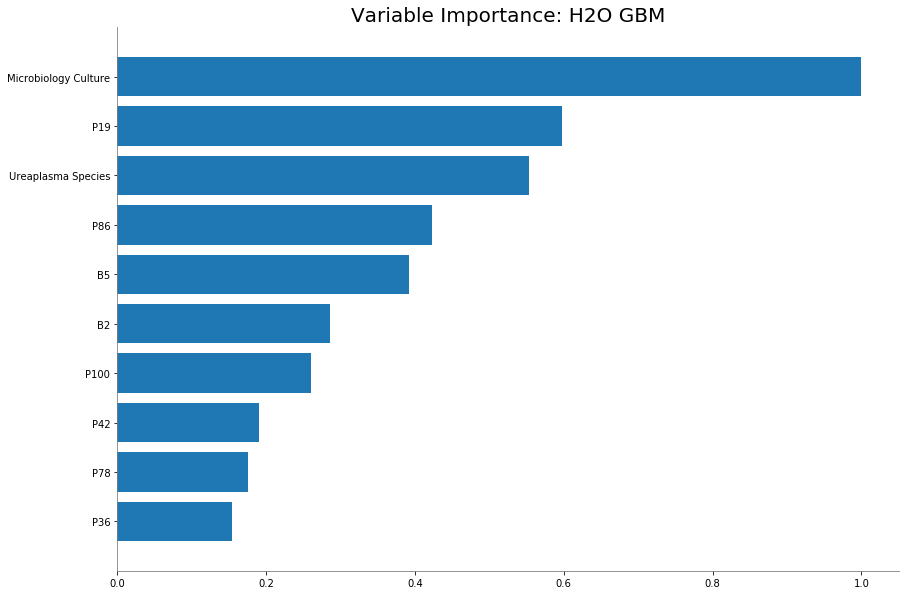

In [106]:
best_model.varimp_plot(10)

#### 4.2 Retrive the most important variables based on the 2nd best model:

In [107]:
best_model_2 = h2o.get_model(aml.leaderboard[1,'model_id'])
print('The algorithm of best model: ', best_model_2.algo)

The algorithm of best model:  gbm


In [129]:
matrix_VI_2=best_model_2.varimp(True)
matrix_VI_2[matrix_VI['relative_importance']>0.70]

,variable,relative_importance,scaled_importance,percentage
0,P100,8.436317,1.000000,0.213019
1,Microbiology Culture,7.398062,0.876930,0.186802
2,Ureaplasma Species,4.918159,0.582975,0.124184
3,B2,3.028700,0.359007,0.076475
4,P78,2.594513,0.307541,0.065512
5,P43,2.564437,0.303976,0.064753
6,P34,2.294067,0.271927,0.057926
7,P57,1.423526,0.168738,0.035944
8,P19,1.303541,0.154515,0.032915
9,P9,1.197692,0.141969,0.030242


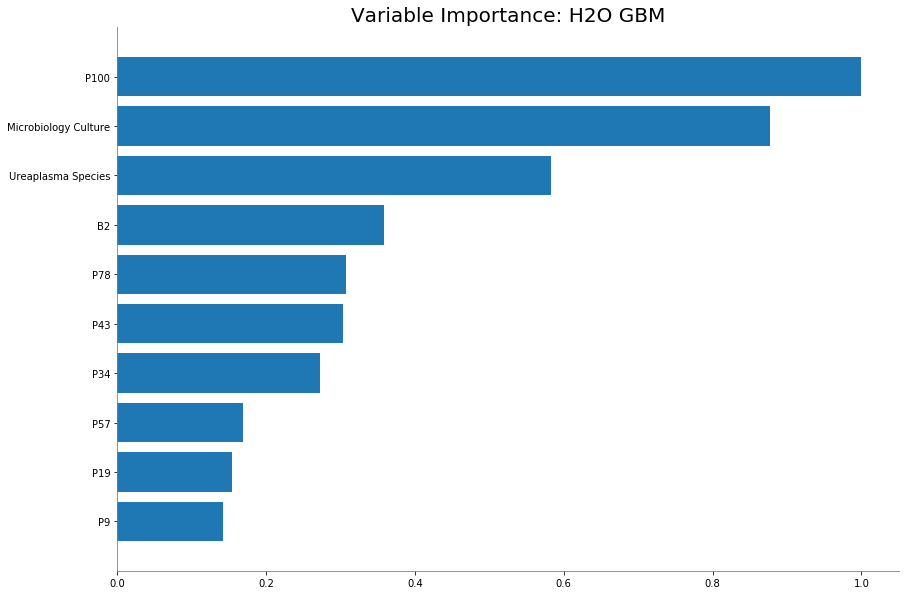

In [121]:
best_model_2.varimp_plot(10)

#### 4.3 Retrive the important variables based on 3rd best model:

In [122]:
best_model_3 = h2o.get_model(aml.leaderboard[2,'model_id'])
print('The algorithm of best model: ', best_model_3.algo)

The algorithm of best model:  gbm


In [128]:
matrix_VI_3=best_model_3.varimp(True)
matrix_VI_3[matrix_VI['relative_importance']>1.0]

,variable,relative_importance,scaled_importance,percentage
0,Cervical Beaking,10.005186,1.000000,0.135512
1,P80,5.417593,0.541478,0.073377
2,B7,4.603293,0.460091,0.062348
3,Maternal GDM,3.715326,0.371340,0.050321
4,Ureaplasma Species,3.462694,0.346090,0.046899
5,Maternal BMI,3.230978,0.322930,0.043761
6,P44,2.607989,0.260664,0.035323
7,Have any previous pregnancies had an antepartu...,2.523869,0.252256,0.034184
8,P100,2.200975,0.219983,0.029810
9,P78,1.744037,0.174313,0.023622


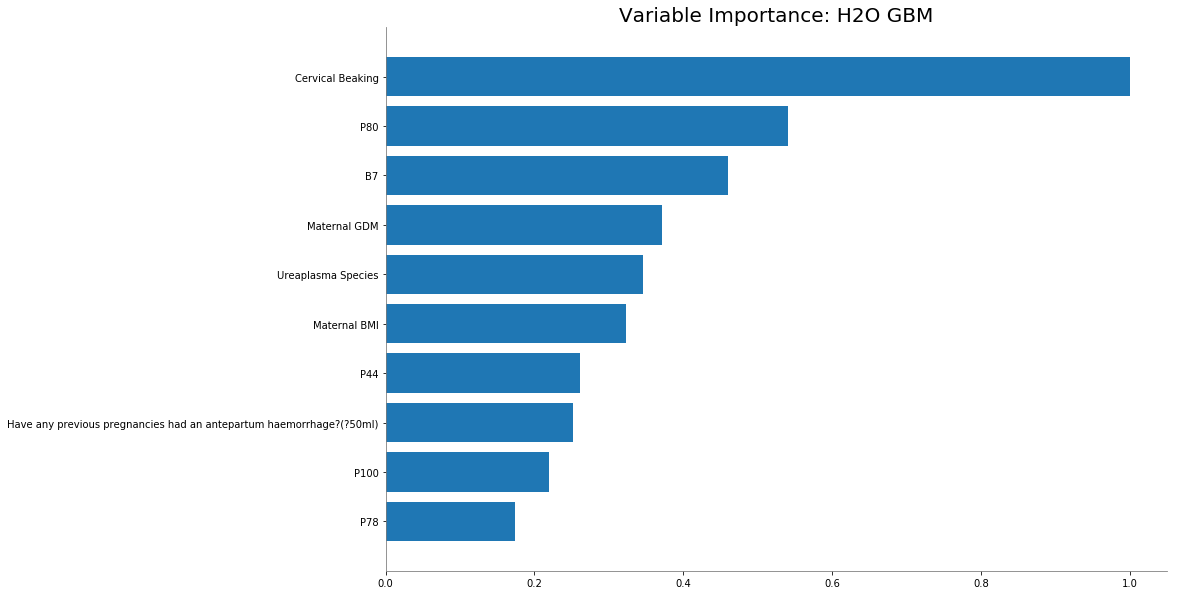

In [124]:
best_model_3.varimp_plot(10)

### <font color='red'> Session 4 Variable importance Conclusion: </font>  
- The most 3 important variables in:
    - Top 1 model- __GBM_grid_1_AutoML_20190731_193406_model_10__:  
        - <font color='red'>Microbiology Culture;   </font>  
        - <font color='red'>P19;  </font>  
        - <font color='red'>Ureaplasma Species;   </font>
        
    - Top 2 model - __GBM_grid_1_AutoML_20190731_193406_model_4__:
        - <font color='red'>P100;   </font>  
        - <font color='red'>Microbiology Culture;  </font>  
        - <font color='red'>Ureaplasma Species;   </font>  
    - Top 3 model -__GBM_grid_1_AutoML_20190731_193406_model_11__:
        - <font color='red'>Cervical Beaking;   </font>  
        - <font color='red'>P80;  </font>  
        - <font color='red'>P7;   </font>
------------------------------------------

### <font color='red'>**(Optional) Session 5 'Partial dependence plot' on some top important features. </font>

#### The PDP plot shows:
    - whether the relationship between the target and a feature(cervical_beaking here) is linear, monotonic or more complex.
    - how this feature(cervical_beaking here) influences the prediction on average.  

#### 5.1: Retrive the PDP of top 1 important variable.

In [109]:
variable_top1 = [(matrix_VI.iloc[:,0])[0]]
print('The most important variable: ', variable_top1)

The most important variable:  ['Microbiology Culture']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


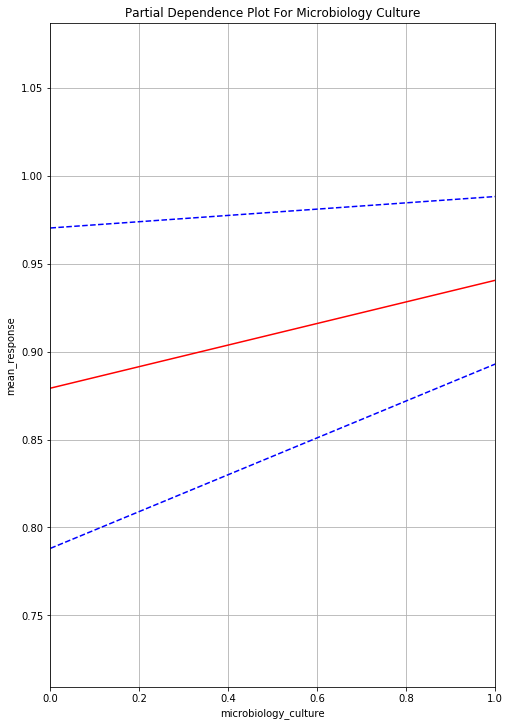

In [111]:
pdp_helpfulness = best_model.partial_plot(frame_training_drop_SeqNo, cols = variable_top1)

- #### This plot shows:
  <font color='red'> The 'microbiology culture' variable will influence the target linearly, and positive correlation.</font>

#### 5.2: Retrive the PDP: the most important variable in 2nd best model.

In [130]:
variable_top2 = [(matrix_VI_2.iloc[:,0])[0]]
print('The most important variable: ', variable_top2)

The most important variable:  ['P100']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


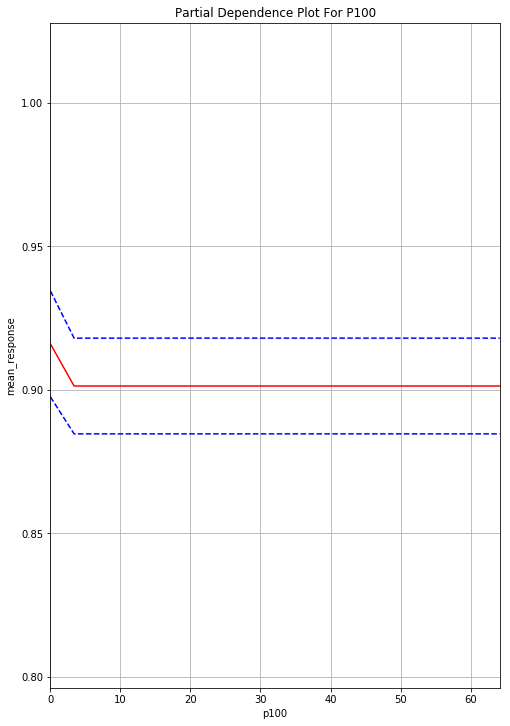

In [131]:
pdp_helpfulness_2 = best_model_2.partial_plot(frame_training_drop_SeqNo, cols = variable_top2)

#### 5.3: Retrive the PDP: the most important variable in 3rd best model.

In [134]:
variable_top3 = [(matrix_VI_3.iloc[:,0])[0]]
print('The most important variable: ', variable_top3)

The most important variable:  ['Cervical Beaking']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


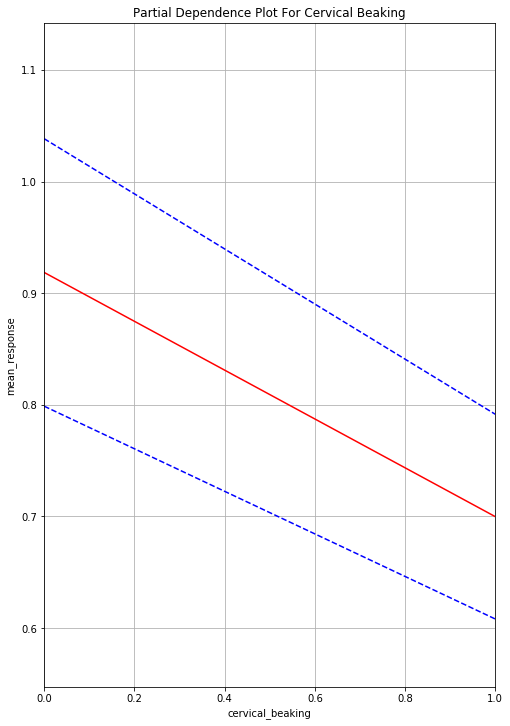

In [135]:
pdp_helpfulness_3 = best_model_3.partial_plot(frame_training_drop_SeqNo, cols = variable_top3)

### <font color='red'>Session 5: Partial dependence plot Conclusion:</font>
   - For 1st best model-__GBM_grid_1_AutoML_20190731_193406_model_10__ :   
       The most important variable <font color='red'>__'microbiology culture'__</font> is <font color='red'>linear and positive correlation to the target</font>.
   - For 2nd best model-__GBM_grid_1_AutoML_20190731_193406_model_4__:  
       The most important variable <font color='red'>__'P100'__</font> is <font color='red'> is negatively correlated to target, but will not influence too much after P100>3.0, the target will be stable afterwards.</font>.
   - For 3rd best model-__GBM_grid_1_AutoML_20190731_193406_model_11__:  
       The most important variable <font color='red'>__'Cervical Beaking'__</font> is <font color='red'>linear and sharply negative correlation to the target</font>.
------------------------------------------

### <font color='red'> Session 6: Predict Term on Production data:</font>
- Based on the picked best model & parameters: __'GBM_grid_1_AutoML_20190731_193406_model_10'__

- Predict the term/pre-term based on __production data__; (Even though current(Jul.26 2019) production data missed 'Gestational Category at Delivery' column.)

#### 6.0: Convert to h2o frame: 

In [112]:
frame_production_preprocessed = h2o.H2OFrame(pd_frame_prod_cp)

Parse progress: |█████████████████████████████████████████████████████████| 100%


#### 6.1: Prediction on the production data:

- Predict on production data with top 1 model trained.

In [113]:
pred_prod = aml.leader.predict(frame_production_preprocessed)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [114]:
print(pred_prod)

predict
0.979975
0.974969
0.912265
0.941027
0.922229
0.794865
0.848037
0.8765
0.891978
0.988821


#### 6.2: Concat the prediction result with Production data.

- Concat the predicted result and seq no.

In [115]:
#pd_pred_prod = pred_prod.as_data_frame().predict

pd_pred_prod = pred_prod.as_data_frame()
# Convert prediction h2oframe to pandaframe, and get the prediction result of every observation.

seqNo_df = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.

In [116]:
#res_seqno_prediction = pd.concat([seqNo_df,pred_res],axis=1,ignore_index = True)
res_seqno_prediction = pd.concat([seqNo_df,pd_pred_prod],axis=1,ignore_index = True)

In [117]:
res_seqno_prediction

,0,1
0,1,0.979975
1,3,0.974969
2,6,0.912265
3,7,0.941027
4,8,0.922229
5,9,0.794865
6,12,0.848037
7,13,0.876500
8,14,0.891978
9,16,0.988821


#### 6.3.1 Get the predicted result based on 2nd best model:

In [144]:
pred_prod_2 = best_model_2.predict(frame_production_preprocessed)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [145]:
pd_pred_prod_2 = pred_prod_2.as_data_frame()
seqNo_df_2 = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.
res_seqno_prediction_2 = pd.concat([seqNo_df_2,pd_pred_prod_2],axis=1,ignore_index = True)

In [146]:
res_seqno_prediction_2

,0,1
0,1,0.929325
1,3,0.931685
2,6,0.900735
3,7,0.905640
4,8,0.902690
5,9,0.878962
6,12,0.907504
7,13,0.897263
8,14,0.924335
9,16,0.933224


#### 6.3.2 Get the predicted result based on 3rd best model:

In [141]:
pred_prod_3 = best_model_3.predict(frame_production_preprocessed)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [142]:
pd_pred_prod_3 = pred_prod_3.as_data_frame()
seqNo_df_3 = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.
res_seqno_prediction_3 = pd.concat([seqNo_df_3,pd_pred_prod_3],axis=1,ignore_index = True)

In [143]:
res_seqno_prediction_3

,0,1
0,1,0.937492
1,3,0.944794
2,6,0.924740
3,7,0.962953
4,8,0.884173
5,9,0.879364
6,12,0.852920
7,13,0.710909
8,14,0.959002
9,16,0.995064


In [118]:
#h2o.remove_all()

In [119]:
#h2o.shutdown()